In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
data = yf.download('^GSPC', start = '2023-01-01', end = '2025-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2023-01-03,3824.139893,3878.459961,3794.330078,3853.290039,3959140000
2023-01-04,3852.969971,3873.159912,3815.770020,3840.360107,4414080000
2023-01-05,3808.100098,3839.739990,3802.419922,3839.739990,3893450000
2023-01-06,3895.080078,3906.189941,3809.560059,3823.370117,3923560000
2023-01-09,3892.090088,3950.570068,3890.419922,3910.820068,4311770000


In [4]:
data.columns = [col[1] if col[0] == '^GSPC' else col[0] for col in data.columns]
data.reset_index(inplace = True)
data.head()

,Date,Close,High,Low,Open,Volume
0,2023-01-03,3824.139893,3878.459961,3794.330078,3853.290039,3959140000
1,2023-01-04,3852.969971,3873.159912,3815.770020,3840.360107,4414080000
2,2023-01-05,3808.100098,3839.739990,3802.419922,3839.739990,3893450000
3,2023-01-06,3895.080078,3906.189941,3809.560059,3823.370117,3923560000
4,2023-01-09,3892.090088,3950.570068,3890.419922,3910.820068,4311770000


<Axes: xlabel='Date'>

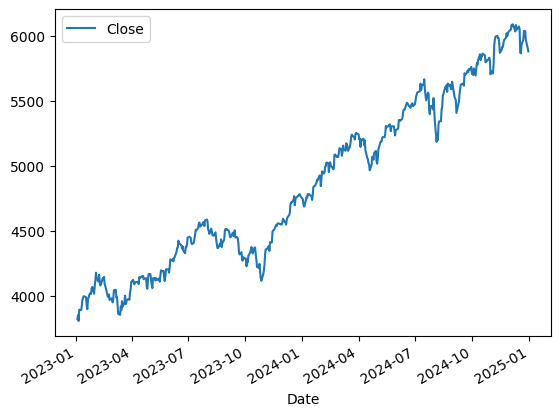

In [5]:
data.dropna
data.plot(x = 'Date', y = "Close")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

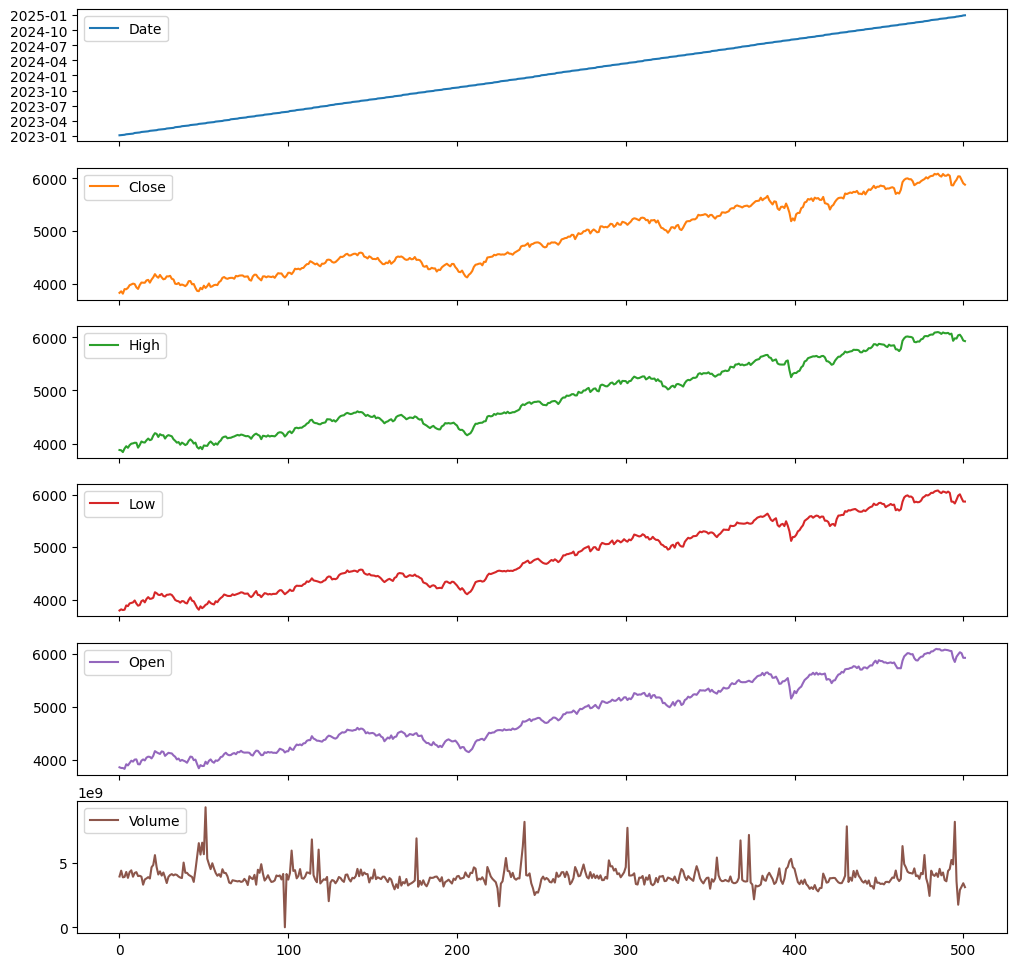

In [6]:
data.plot(kind = "line", figsize = (12, 12), subplots = True)

In [7]:
X = data[['Open','High', 'Low', 'Volume']]
Y = data["Close"]

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [9]:
parameter_grid = {
    'n_estimators': [10, 100, 200, 300],
    'max_depth': [None, 1, 5, 10, 15],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2', None, 'int']
}    

In [10]:
model = RandomForestRegressor(random_state = 42)
GSV = GridSearchCV(estimator = model, param_grid = parameter_grid, cv = 5, n_jobs = -1)

In [11]:
GSV.fit(xtrain, ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 1, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [12]:
print("Best Prarameters:", GSV.best_params_)

Best Prarameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [13]:
print("Best Score:", GSV.best_score_)

Best Score: 0.9988413040729597


In [14]:
best_model = GSV.best_estimator_
y_pred = best_model.predict(xtest)
residuals = ytest - y_pred
df = pd.DataFrame({
    "Actual values": ytest,
    "Predicted values": y_pred,
    "Residuals": residuals
})
df.head()

,Actual values,Predicted values,Residuals
268,4927.930176,4901.145952,26.784224
73,4154.520020,4146.289074,8.230946
289,5069.759766,5069.658437,0.101329
155,4404.330078,4410.936237,-6.606159
104,4282.370117,4281.398874,0.971243


In [15]:
MSE = mean_squared_error(ytest, y_pred)
rsquared = r2_score(ytest, y_pred)
print(f"MSE: {MSE:.2f}, R-squared: {rsquared:.2f}")

MSE: 750.57, R-squared: 1.00
